# Mercedes-Benz Greener Manufacturing

> ## Reduce the time a Mercedes-Benz spends on the test bench.

#### Problem Statement Scenario:

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

#### Following actions should be performed:

> If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

> Check for null and unique values for test and train sets.

> Apply label encoder.

> Perform dimensionality reduction.

> Predict your test_df values using XGBoost.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_train = pd.read_csv('train.csv')
base_test = pd.read_csv('test.csv')

In [3]:
base_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
base_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
print('Shape of Training dataset :', base_train.shape)
print('Shape of Testing dataset :', base_test.shape)

Shape of Training dataset : (4209, 378)
Shape of Testing dataset : (4209, 377)


#### Check type of data for all the available variables

In [6]:
D_type = base_train.dtypes.reset_index()
D_type.columns = ["Count", "Column Type"]
D_type.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>From above output it is clear that there are -</strong></font>
<br>

- 8 Categorical Variables
<br>    
- 369 int64 Variables (Descrete Variables)
<br>    
- 1 float64 Variable (Continuous Target Variable)
</div>

#### Target Variable Analysis

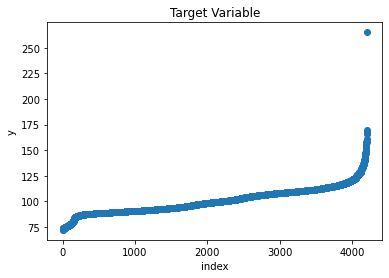

In [7]:
plt.scatter(range(base_train.shape[0]),np.sort(base_train["y"]))
plt.title("Target Variable")
plt.xlabel("index")
plt.ylabel("y")
plt.show()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Target Variable has an outlier, which in this case is after value of 175.</strong></font>
<br>

- Since, the model predicts well in case when the outliers are treated properly. The Outlier must be excluded from Target variable "y".
</div>

In [8]:
modified_train = base_train[base_train["y"] < 175]
modified_train.shape

(4208, 378)

#### Keeping one variable out of other duplicate variables

In [9]:
# Taking out Numerical variables in a separate dataframe as num

numerical = modified_train.loc[:, modified_train.dtypes == np.int64].drop(['ID'], axis=1)
numerical.shape

(4208, 368)

In [10]:
# This will keep one variable from all the duplicates.
## Lets say if X31, X35, X37 are all duplicates, the below code will only keep X31.

rem_cols = []  # rem_cols will contain all the variables which need to be dropped from train dataset.

duplicates = list(numerical.T.index[numerical.T.duplicated(keep="first")].values)
print(duplicates)

rem_cols.extend(duplicates) # Adding duplicates to rem_cols

['X35', 'X37', 'X39', 'X76', 'X84', 'X93', 'X94', 'X102', 'X107', 'X113', 'X119', 'X122', 'X134', 'X146', 'X147', 'X172', 'X199', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X233', 'X235', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X266', 'X268', 'X279', 'X289', 'X290', 'X293', 'X296', 'X297', 'X299', 'X302', 'X320', 'X324', 'X326', 'X330', 'X347', 'X360', 'X364', 'X365', 'X382', 'X385']


In [11]:
# removing features with variance 0

temp = []
for i in numerical.columns:
    if numerical[i].var() == 0:
        temp.append(i)

print('Number of Variables with variance < Threshold Value :', len(temp))

Number of Variables with variance < Threshold Value : 12


In [12]:
rem_cols.extend(temp) # Adding temp to rem_cols

#### Categorical Feature Analysis

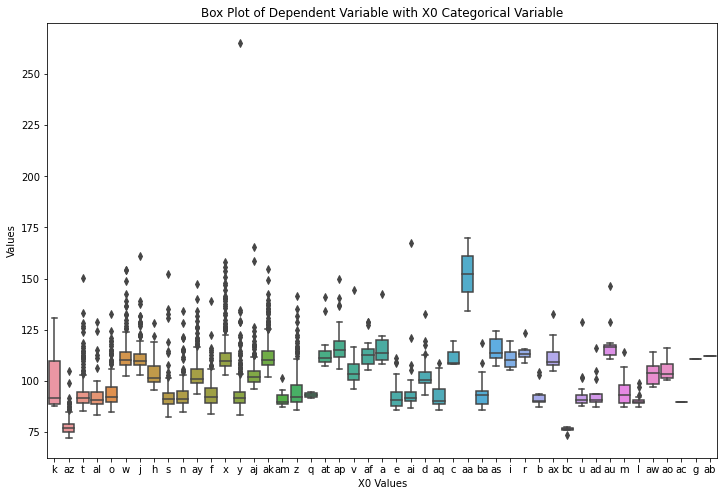

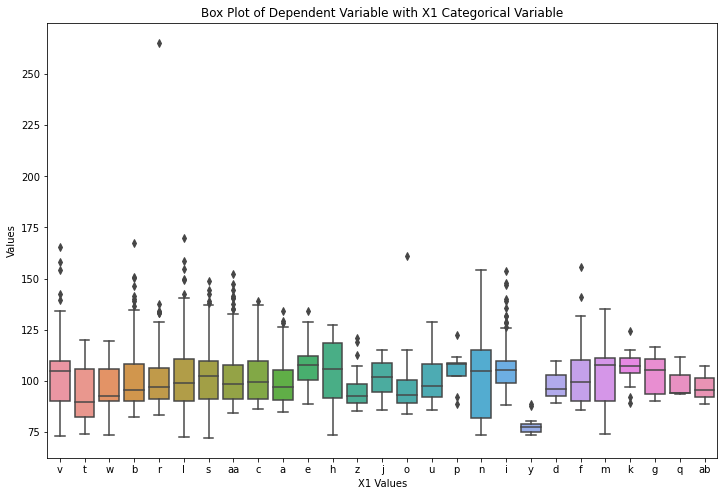

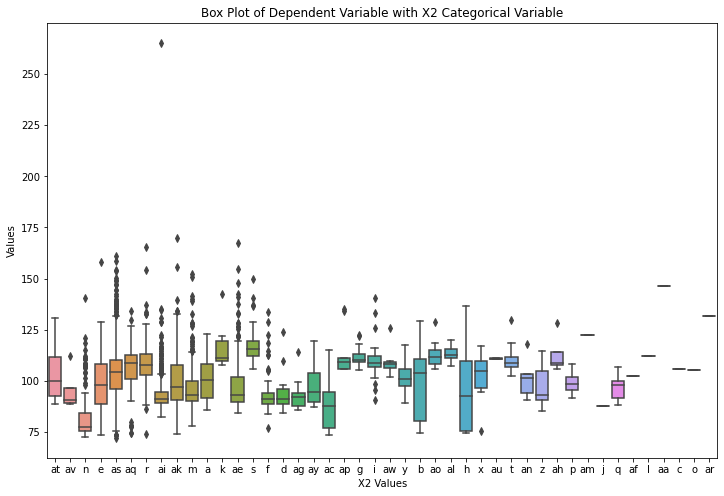

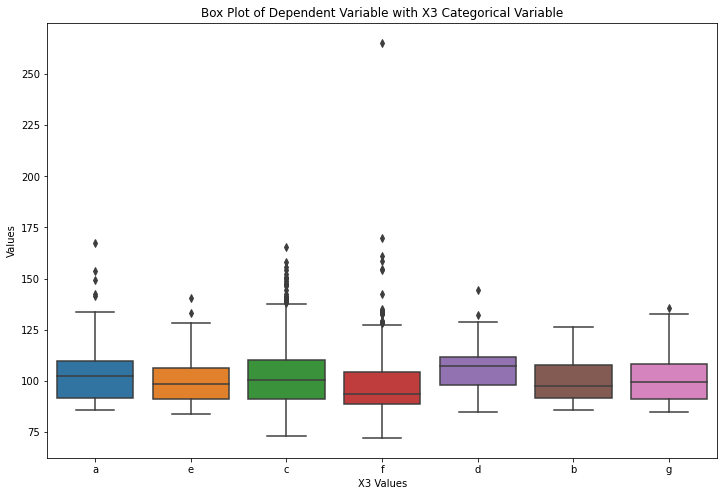

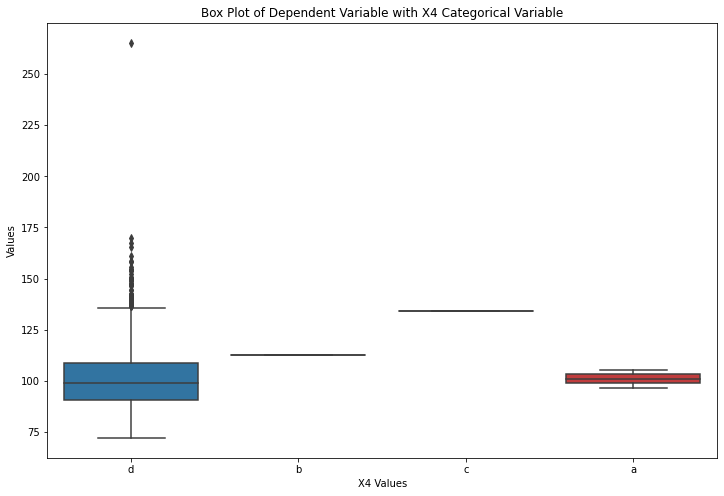

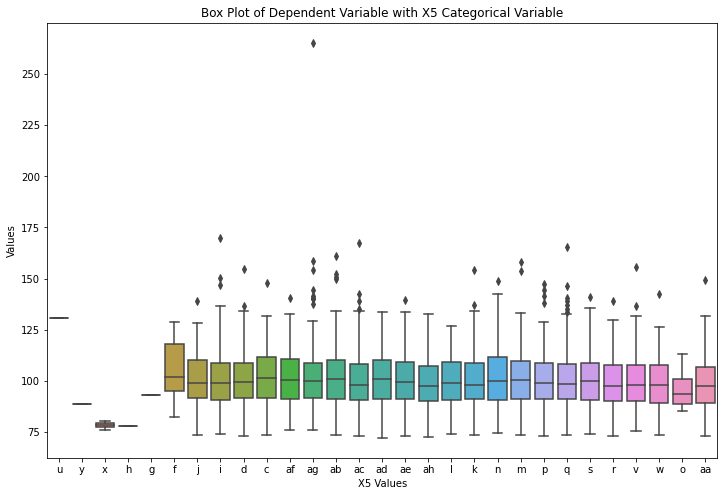

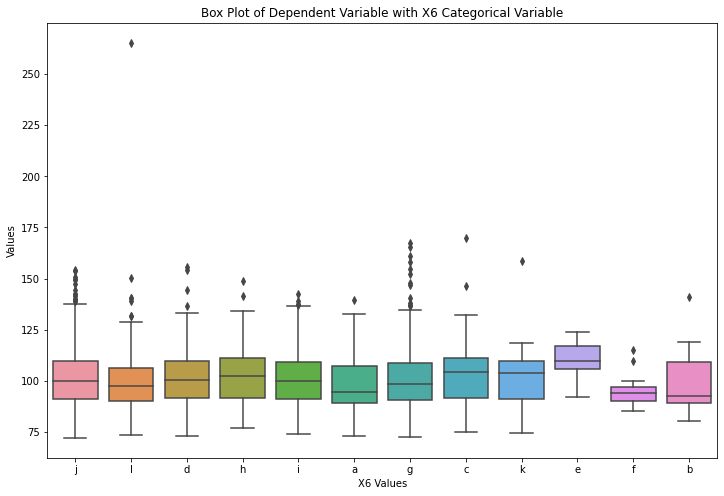

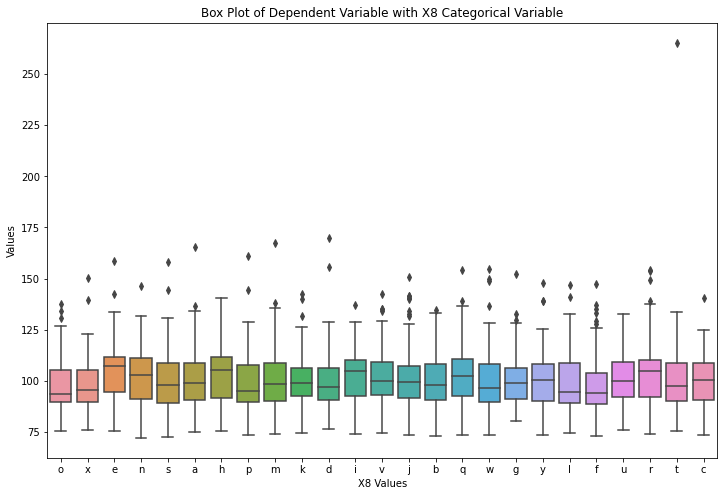

In [13]:
for i in list(base_train.columns):
    if(base_train[i].dtypes == object):
        plt.figure(figsize = (12, 8))
        sns.boxplot(y = base_train['y'], x = base_train[i])
        plt.xlabel(i + " Values")
        plt.ylabel("Values")
        plt.title("Box Plot of Dependent Variable with "+ i + " Categorical Variable")

#### Variable - 'X4' has very low variance as compared to other features.

In [14]:
# Adding X4 to rem_cols

rem_cols.append("X4")

#### Dropping all the required variables from the train dataset

In [15]:
train = modified_train.drop(rem_cols, axis = 1)

In [16]:
print('Shape of training dataset at initial stage :', base_train.shape)
print('Shape of training dataset after pre-processing stage :', train.shape)

Shape of training dataset at initial stage : (4209, 378)
Shape of training dataset after pre-processing stage : (4208, 320)


In [17]:
print("Number of removed features: ", base_train.shape[1] - train.shape[1])

Number of removed features:  58


#### Preparing Test dataset

In [18]:
test = base_test.drop(rem_cols, axis=1)
test.shape

(4209, 319)

#### Using Label Encoder for Categorical Variables

In [19]:
# process columns, apply LabelEncoder to categorical features
from sklearn.preprocessing import LabelEncoder

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

# shape
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))

Shape train: (4208, 320)
Shape test: (4209, 319)


In [20]:
train.head()

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,130.81,37,23,20,0,27,9,14,0,...,0,0,0,0,1,0,0,0,0,0
1,6,88.53,37,21,22,4,31,11,14,0,...,0,0,1,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,30,9,23,0,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,24,21,38,5,30,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,14,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test.head()

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,1,24,23,38,5,26,0,22,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,46,3,9,0,9,6,24,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,24,23,19,5,0,9,9,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,24,13,38,5,32,11,13,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,49,20,19,2,31,8,12,0,0,...,0,0,1,0,0,0,0,0,0,0


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Optimum Number of Principal components.</strong></font>
<br>

- Pass all the variables except ID and Target Variable.
<br>   
- Plot cummulative sum of principal components v/s number of components.
</div>

In [22]:
from sklearn.decomposition import PCA

pca_optimum = train.drop(['y', 'ID'], axis = 1)

In [23]:
# To check how many Principal components will be required to coveer 99% of the Variance.

pca = PCA(n_components = 0.99)
pd.DataFrame(pca.fit_transform(pca_optimum)).shape

(4208, 23)

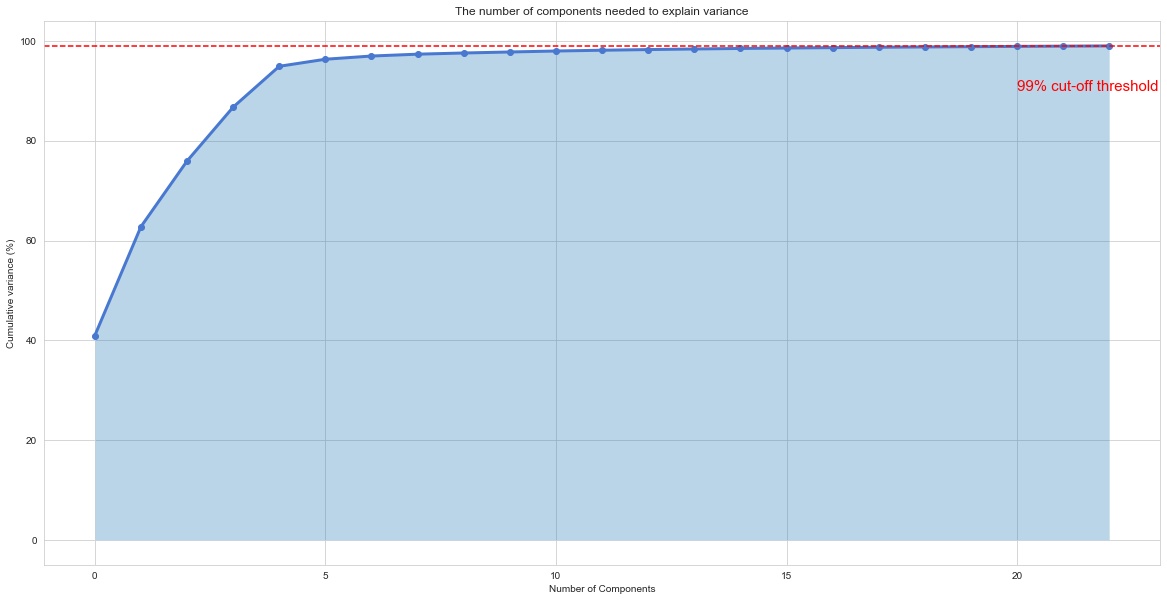

In [24]:
# Defining Grid style and plot size
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20,10)

# Color palette
blue, = sns.color_palette("muted", 1)

x = np.arange(pd.DataFrame(pca.fit_transform(pca_optimum)).shape[1])
y = np.cumsum(pca.explained_variance_ratio_*100)

# Make the plot

fig, ax = plt.subplots()
ax.plot(x, y, color=blue, lw=3, marker='o')
ax.fill_between(x, 0, y, alpha=.3)

plt.axhline(y = 99, color = 'r', linestyle = '--')
plt.text(20, 90, '99% cut-off threshold', color = 'red', fontsize = 15)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.show()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Optimum Value for Number of Principal components = 23.</strong></font>
<br>

- 99% of the Variance is captured by first 23 Principal components. Therefore, n_components = 23 is the optimum value for this analysis.
</div>

In [25]:
n_comp = 23

# PCA
final_pca = PCA(n_components = n_comp)

pca_train = final_pca.fit_transform(train.drop(["y", "ID"], axis = 1))
pca_test = final_pca.fit_transform(test.drop(["ID"], axis = 1))

In [26]:
print(pca_train.shape)
print(pca_test.shape)

(4208, 23)
(4209, 23)


In [27]:
# Append decomposition components to datasets

for i in range(1, n_comp + 1):
    train['pca_' + str(i)] = pca_train[:, i - 1]
    test['pca_' + str(i)] = pca_test[:, i - 1]

In [28]:
from sklearn.model_selection import train_test_split

# Split the whole training dataset into train and test

X = train.drop(['y', 'ID'], axis = 1)
y = train[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2945, 341)
(2945, 1)
(1263, 341)
(1263, 1)


In [30]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [31]:
num_boost_rounds = 1250

# prepare dict of parameters for xgboost to run with

xgb_params = {
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
}

# train model
XGB = xgb.train(xgb_params, dtrain, num_boost_round = num_boost_rounds)

In [32]:
y_pred = XGB.predict(dtest)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

print('R-squared :', r2_score(y_test, y_pred))
print('MAE Score :', mean_absolute_error(y_test, y_pred))
print('MSE Score :', mean_squared_error(y_test, y_pred))
print('RMSE Score :', sqrt(mean_squared_error(y_test, y_pred)))


R-squared : 0.5763251825033786
MAE Score : 5.218986296906701
MSE Score : 67.70577497082235
RMSE Score : 8.228351898820465


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>After applying XGBoost on training dataset (based on 70, 30 split), the R-Squared Score is 0.57. Now the model has to be applied on test dataset where we do not have the target variable available.</strong></font>
<br>

</div>

In [33]:
# Using train and test datasets available in 2 separate CSV files.

dtrain = xgb.DMatrix(train.drop(['ID','y'], axis = 1), train['y'])
dtest = xgb.DMatrix(test.drop(['ID'], axis = 1))

In [34]:
num_boost_rounds = 1250

# prepare dict of parameters for xgboost to run with

xgb_params = {
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
}

# train model
XGB = xgb.train(xgb_params, dtrain, num_boost_round = num_boost_rounds)

In [35]:
# Predict y (target variable) in test dataset.

pred_y_test = XGB.predict(dtest)

output = pd.DataFrame({'ID': test['ID'].astype(np.int32), 'y': pred_y_test})

In [36]:
output.head(20)

,ID,y
0,1,82.798897
1,2,98.073128
2,3,82.149025
3,4,78.666046
4,5,111.726120
5,8,91.806984
6,10,109.487045
7,11,94.380783
8,12,113.940765
9,14,94.669640


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>The Output is final predicted y.</strong></font>
<br>

- Since, there is no target variable provided in test CSV file, evaluation can't take place.
<br>
- Save results to CSV file. 
</div>

In [37]:
# save results

output.to_csv('Predicted_y_Final_Output.csv', index = False)

### Submitted By : 
[Jay Shembekar](https://www.linkedin.com/in/jay-shembekar-13b223146)